<a href="https://colab.research.google.com/github/ritwik4444/AJAX-Movie-Recommendation-System-with-Sentiment-Analysis/blob/main/hate_speech_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import nltk
import re
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from nltk.util import pr
from nltk.corpus import stopwords


IMPORT DATASET

MAP THE COLUMN FOR HATESPEECH

In [3]:
df = pd.read_csv("labeled_data.csv")
print(df.head(50))


    Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0            0      3            0                   0        3      2   
1            1      3            0                   3        0      1   
2            2      3            0                   3        0      1   
3            3      3            0                   2        1      1   
4            4      6            0                   6        0      1   
5            5      3            1                   2        0      1   
6            6      3            0                   3        0      1   
7            7      3            0                   3        0      1   
8            8      3            0                   3        0      1   
9            9      3            1                   2        0      1   
10          10      3            0                   3        0      1   
11          11      3            0                   3        0      1   
12          12      3            0    

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')


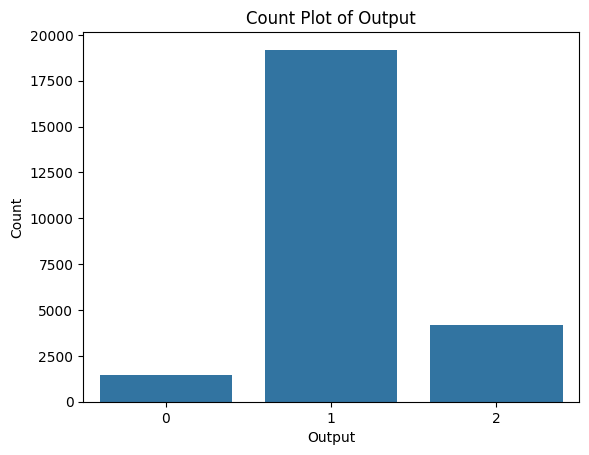

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

print(df.columns)


# Step 2: Create a count plot of the 'output' column

sns.countplot(x='class', data=df)
plt.title('Count Plot of Output')
plt.xlabel('Output')
plt.ylabel('Count')
plt.show()


In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)



                    Unnamed: 0     count  hate_speech  offensive_language  \
Unnamed: 0            1.000000  0.023947    -0.054345            0.043773   
count                 0.023947  1.000000     0.101926            0.534604   
hate_speech          -0.054345  0.101926     1.000000           -0.261808   
offensive_language    0.043773  0.534604    -0.261808            1.000000   
neither              -0.005187  0.063326    -0.157599           -0.684406   
class                 0.024525 -0.010029    -0.515732           -0.410440   

                     neither     class  
Unnamed: 0         -0.005187  0.024525  
count               0.063326 -0.010029  
hate_speech        -0.157599 -0.515732  
offensive_language -0.684406 -0.410440  
neither             1.000000  0.800687  
class               0.800687  1.000000  


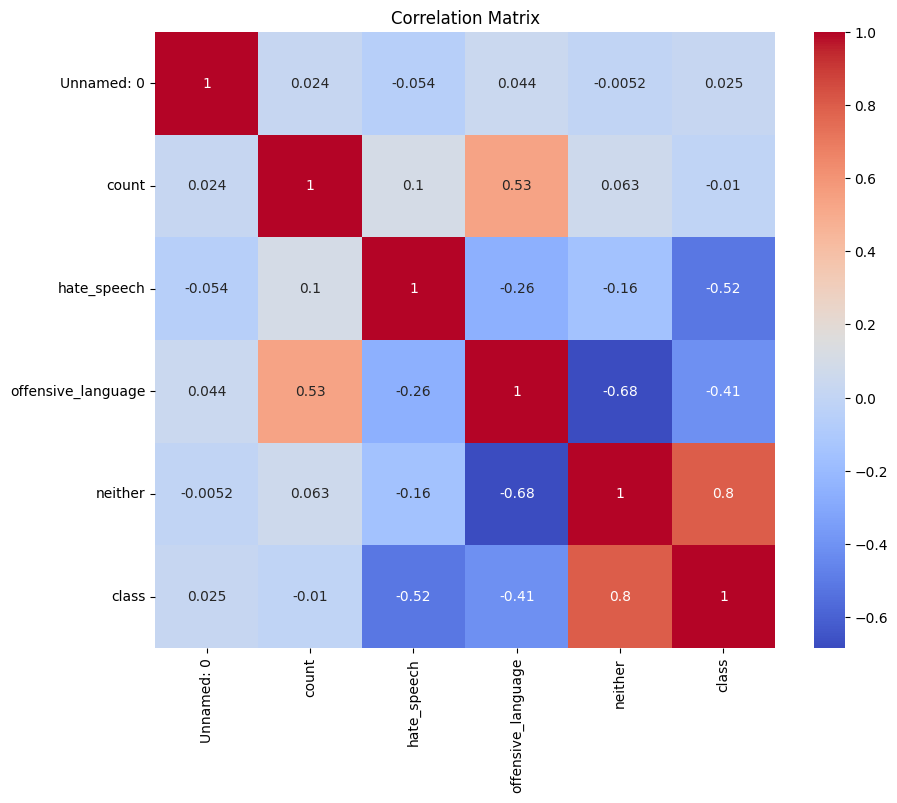

In [7]:


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
df["labels"]=df["class"].map({0:"Hate Speech" , 1:"offensive language" ,  2: "Normal"})
print(df.head(50))


    Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0            0      3            0                   0        3      2   
1            1      3            0                   3        0      1   
2            2      3            0                   3        0      1   
3            3      3            0                   2        1      1   
4            4      6            0                   6        0      1   
5            5      3            1                   2        0      1   
6            6      3            0                   3        0      1   
7            7      3            0                   3        0      1   
8            8      3            0                   3        0      1   
9            9      3            1                   2        0      1   
10          10      3            0                   3        0      1   
11          11      3            0                   3        0      1   
12          12      3            0    

SPLIT NECESSARY COLUMN FROM DATASET(eg: tweet and label)

In [9]:
df=df[["tweet","labels"]]
print(df.head(50))

                                                tweet              labels
0   !!! RT @mayasolovely: As a woman you shouldn't...              Normal
1   !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  offensive language
2   !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  offensive language
3   !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  offensive language
4   !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  offensive language
5   !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...  offensive language
6   !!!!!!"@__BrighterDays: I can not just sit up ...  offensive language
7   !!!!&#8220;@selfiequeenbri: cause I'm tired of...  offensive language
8   " &amp; you might not get ya bitch back &amp; ...  offensive language
9   " @rhythmixx_ :hobbies include: fighting Maria...  offensive language
10  " Keeks is a bitch she curves everyone " lol I...  offensive language
11                 " Murda Gang bitch its Gang Land "  offensive language
12  " So hoes that smoke are losers ? 

CLEAN THE SENTENCE IN DATASET(removing unwanted text or regular expression)

In [10]:
def clean(text):
  text=str(text).lowe()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|www\.\S+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=" ".join(text)
  text=[stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text

  data["tweet"]=data["tweet"].apply(clean)


TRAIN DATASET(using decision tree classifier algorithm ,it will divide the column into two types hate speech and non-hat speech) , below variable x for array and X for train and test

In [11]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing 'tweet' and 'labels' columns
x = np.array(df["tweet"])
y = np.array(df["labels"])

# Convert text data into numerical format using CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(x)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define and call the models function
def models(X_train, Y_train):
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0, criterion="entropy")
    tree.fit(X_train, Y_train)

    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    forest.fit(X_train, Y_train)

    print('[0] Logistic Regression accuracy:', log.score(X_train, Y_train))
    print('[1] Decision Tree accuracy:', tree.score(X_train, Y_train))
    print('[2] Random Forest accuracy:', forest.score(X_train, Y_train))

    return log, tree, forest

# Call the models function with training data
log_model, tree_model, forest_model = models(X_train, y_train)

# Now you can use these models to make predictions, evaluate them on the test set, etc.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0] Logistic Regression accuracy: 0.9853047458443749
[1] Decision Tree accuracy: 1.0
[2] Random Forest accuracy: 0.9943989400144544


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0] Logistic Regression accuracy: 0.9853047458443749
[1] Decision Tree accuracy: 1.0
[2] Random Forest accuracy: 0.9943989400144544
Model 0: Logistic Regression
                    precision    recall  f1-score   support

       Hate Speech       0.47      0.25      0.32       465
            Normal       0.84      0.87      0.85      1379
offensive language       0.93      0.95      0.94      6335

          accuracy                           0.90      8179
         macro avg       0.75      0.69      0.71      8179
      weighted avg       0.89      0.90      0.89      8179

Accuracy on testing score: 0.8996209805599706
Accuracy on training score: 0.9853047458443749

Model 1: Decision Tree
                    precision    recall  f1-score   support

       Hate Speech       0.31      0.25      0.28       465
            Normal       0.84      0.86      0.85      1379
offensive language       0.93      0.94      0.93      6335

          accuracy                           0.88      81

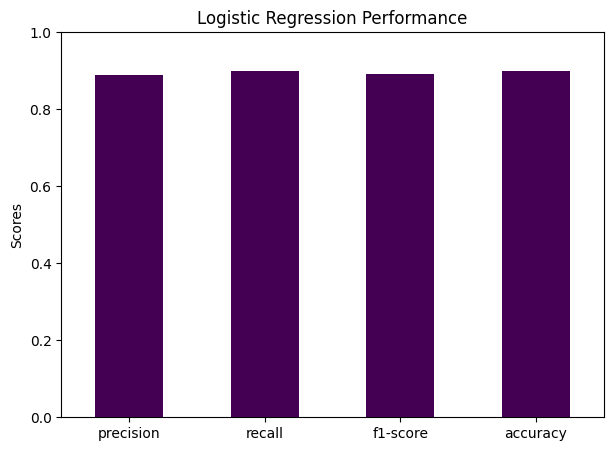

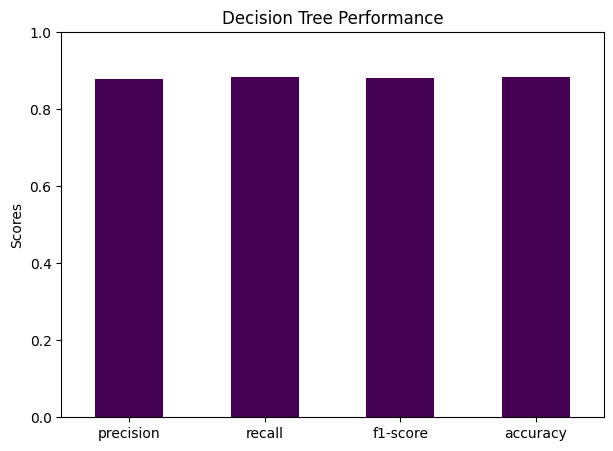

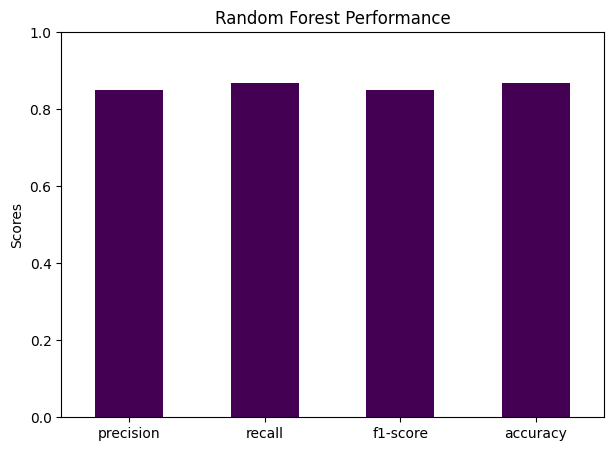

In [12]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing 'tweet' and 'labels' columns
x = np.array(df["tweet"])
y = np.array(df["labels"])

# Convert text data into numerical format using CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(x)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Train the models using the corrected Y_train
model = models(X_train, y_train)

# Prepare to collect metrics
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]
metrics = {"precision": [], "recall": [], "f1-score": [], "accuracy": []}

# Loop through each model to evaluate performance
for i in range(len(model)):
    print(f"Model {i}: {model_names[i]}")

    # Generate classification report and accuracy
    report = classification_report(y_test, model[i].predict(X_test), output_dict=True)

    # Extract and store precision, recall, f1-score, and accuracy for the 'weighted avg' class
    metrics["precision"].append(report["weighted avg"]["precision"])
    metrics["recall"].append(report["weighted avg"]["recall"])
    metrics["f1-score"].append(report["weighted avg"]["f1-score"])

    accuracy = accuracy_score(y_test, model[i].predict(X_test))
    metrics["accuracy"].append(accuracy)

    # Print detailed classification report
    print(classification_report(y_test, model[i].predict(X_test)))
    print('Accuracy on testing score:', accuracy)
    print('Accuracy on training score:', accuracy_score(y_train, model[i].predict(X_train)))
    print()

# Convert the metrics dictionary to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics, index=model_names)

for model_name in metrics_df.index:
    metrics_df.loc[model_name].plot(kind='bar', figsize=(7, 5), colormap="viridis")
    plt.title(f"{model_name} Performance")
    plt.ylabel("Scores")
    plt.ylim(0, 1)  # Ensure the y-axis is consistent across plots
    plt.xticks(rotation=0)
    plt.show()


VALIDATA THE DATASET (whether hatespeech or not)

In [17]:
sample="fuck"
data=cv.transform([sample]).toarray()

# Choose one of your trained models
clf = log_model  # or tree_model, or forest_model

print(clf.predict(data))

['offensive language']
